In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")
data.head()

# Transform housing.csv data into dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

# Show dataframe info and find null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


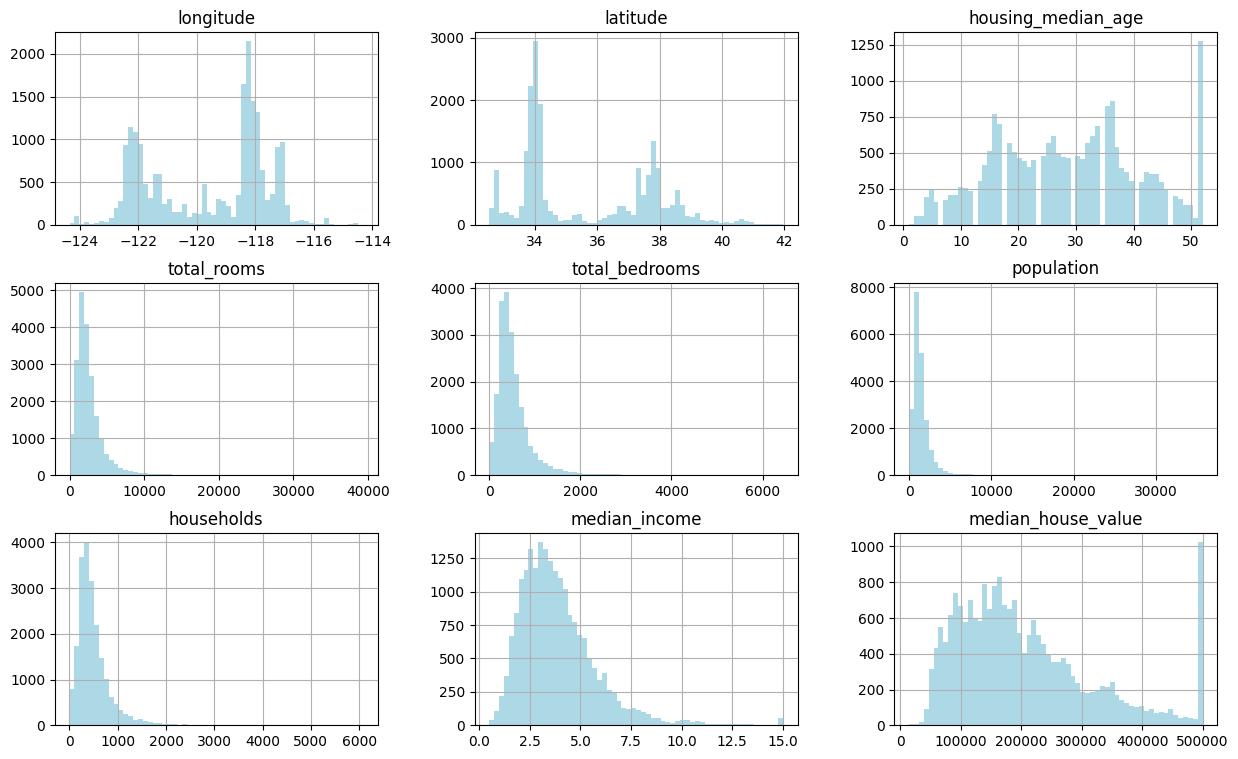

In [4]:
data.hist(bins=60, figsize=(15,9), color="lightblue");

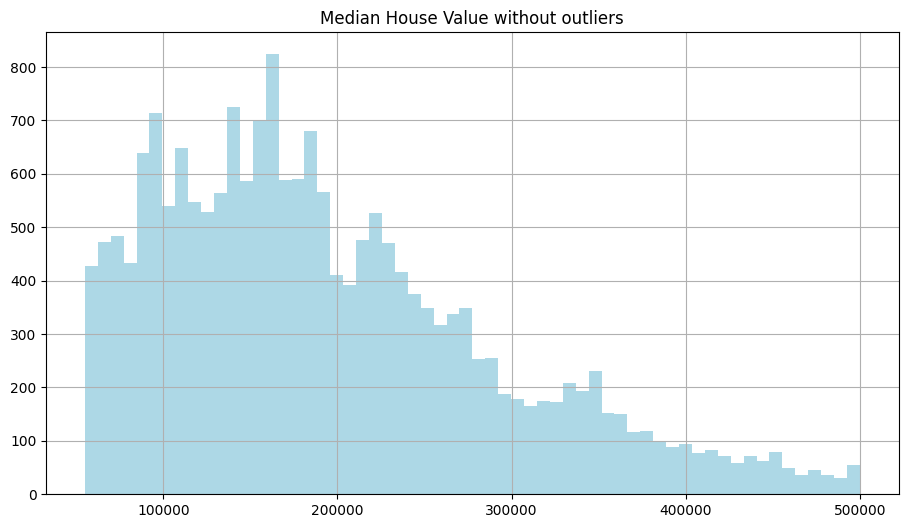

In [5]:
# removing the outliers

data = data[data['median_house_value'] < data['median_house_value'].quantile(0.98)]
data = data[data['median_house_value'] > data['median_house_value'].quantile(0.02)]


data['median_house_value'].hist(bins=60, figsize=(11,6), color="lightblue");
plt.title("Median House Value without outliers");

In [6]:
# Remove rows with null values
data.dropna(inplace=True)

# Convert categorical feature "ocean_proximity" into dummy/indicator feature

dummies = pd.get_dummies(data['ocean_proximity'], dtype=int)
data.drop(['ocean_proximity'], axis=1, inplace=True)
data = data.join(dummies)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


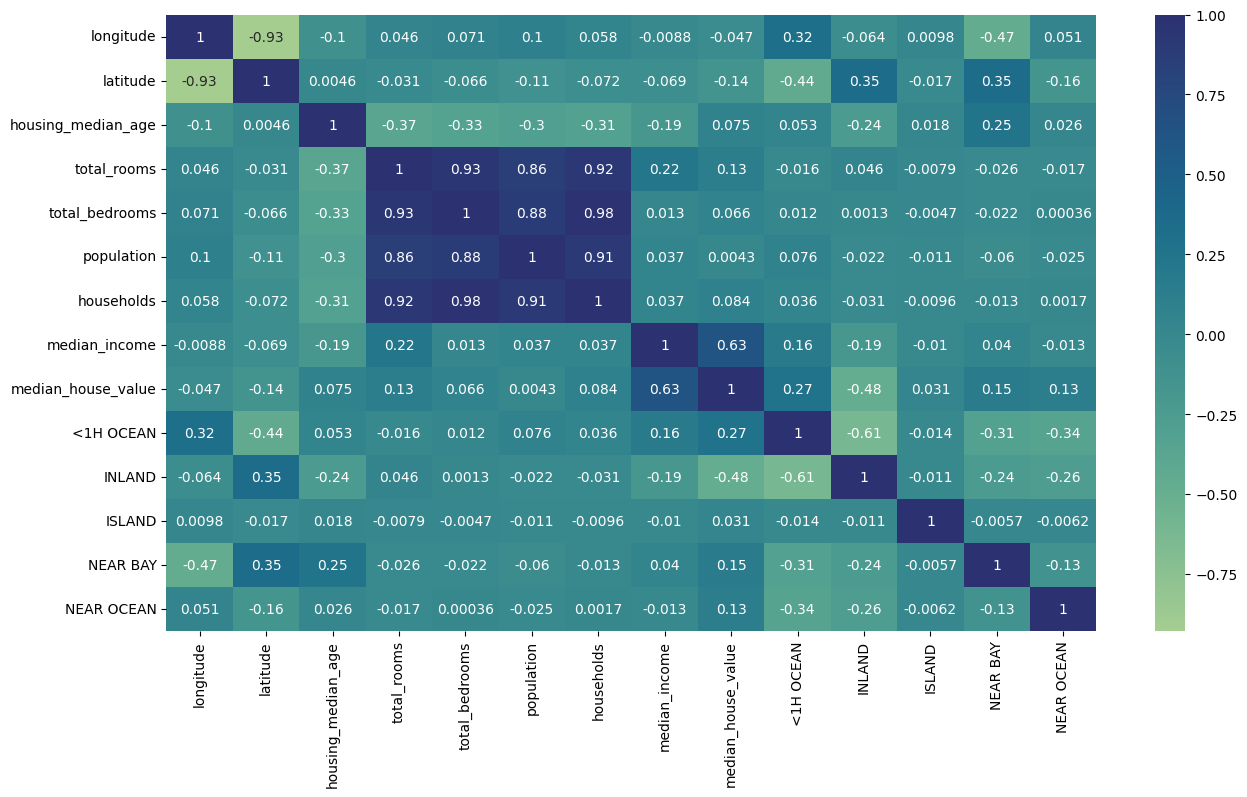

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="crest");

# show heatmap of correlations

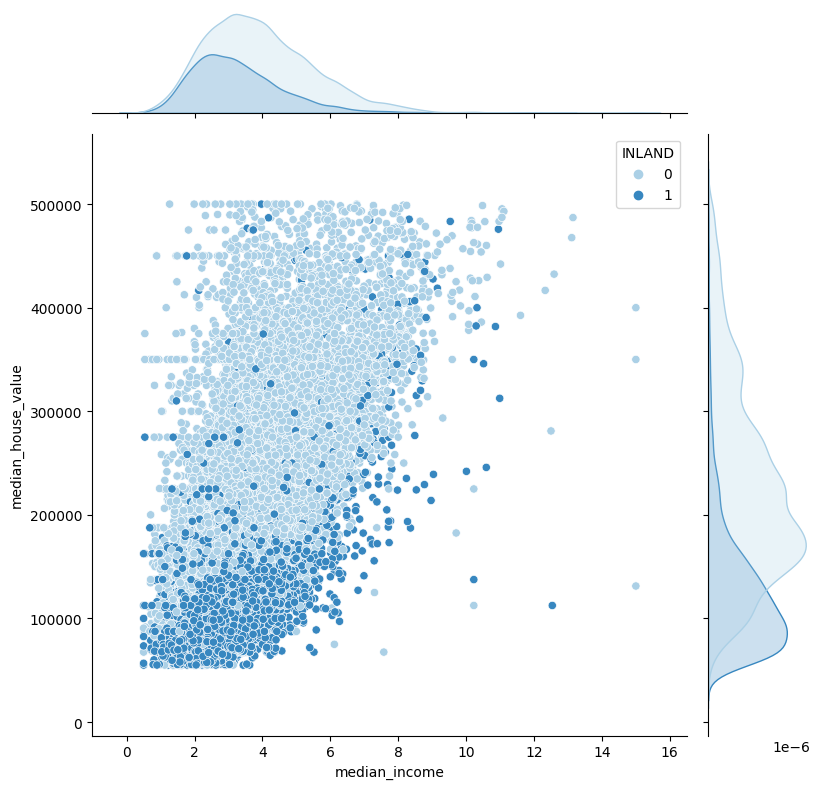

In [19]:
sns.jointplot(x="median_income", y="median_house_value", data=data, kind='scatter', height=8, hue="INLAND", palette="Blues");

# Plot median_house_value against median_income with distributions

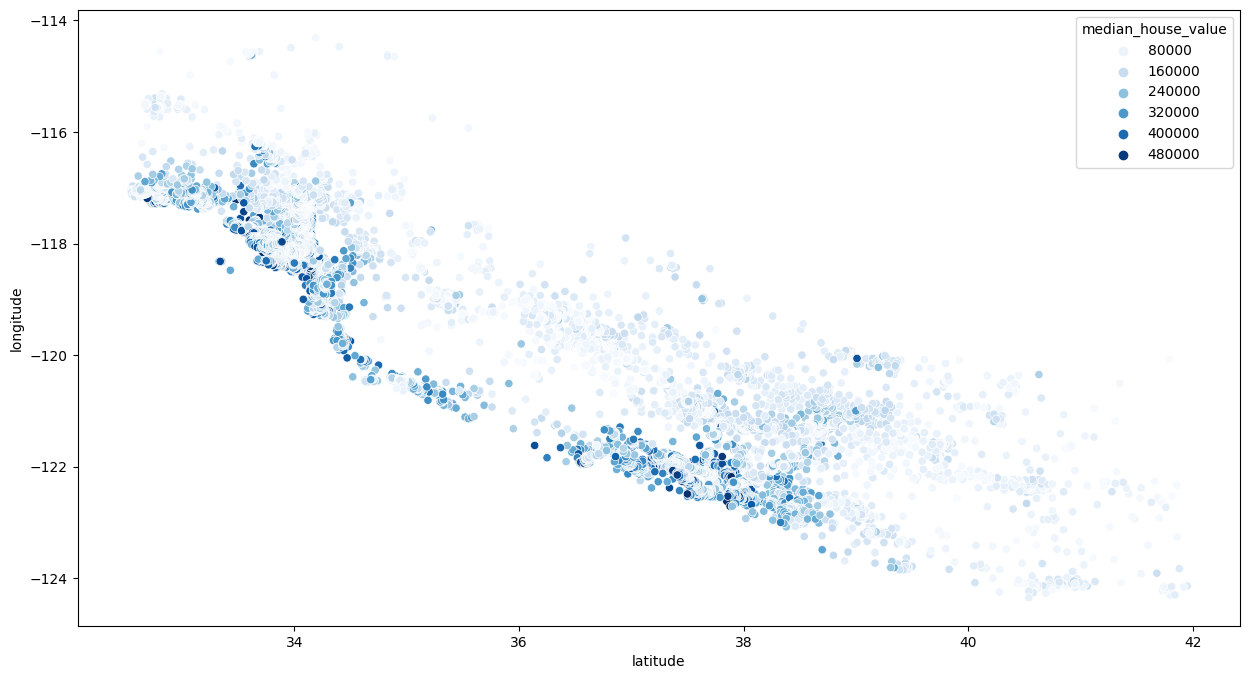

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data = data, hue="median_house_value", palette="Blues");

# show relationship between coordinates and house prices

In [10]:
# feature engineering
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']


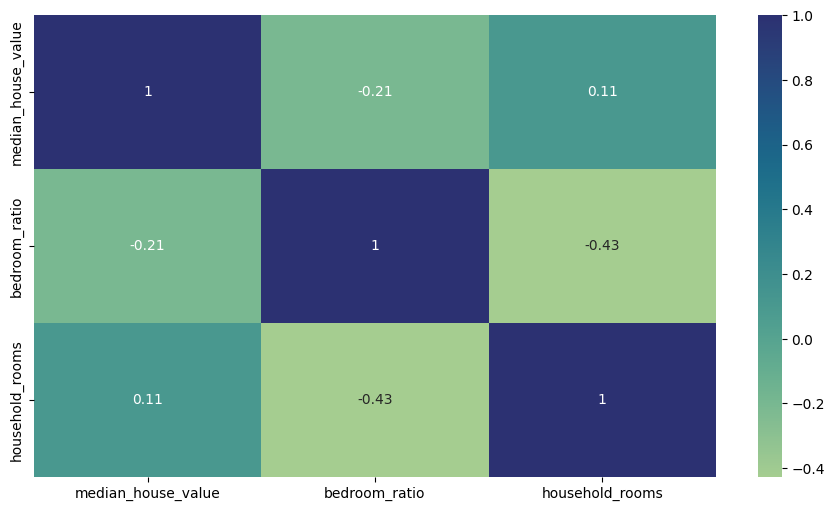

In [11]:
plt.figure(figsize=(11, 6))
sns.heatmap(data[['median_house_value', 'bedroom_ratio', 'household_rooms']].corr(), annot=True, cmap="crest");
# New features correlations on heatmap

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression


linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [14]:
linreg.score(X_test, y_test), linreg.score(X_train, y_train)

(0.5849973830555253, 0.6136700082446731)

In [15]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=12, min_samples_split=50, n_estimators=200).fit(X_train, y_train)

forest.score(X_test, y_test), forest.score(X_train, y_train)

(0.7328809935568238, 0.8127628644521303)

In [16]:
from sklearn.metrics import mean_absolute_error, max_error

y_pred = forest.predict(X_test)
mean_absolute_error(y_test, y_pred)

33499.42688357594

In [17]:
max_error(y_test, y_pred)

353187.3418963713